# Initial Review of the UT-Smoke data set

This is an initial feasibility study into reproducing the results as documented in the research paper <here>

## Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

pd.set_option("display.max_columns", None)

## Modules

In [2]:
#If you don't have it then you'll need to add it to load the excel worksheets. Upgrade pip while we are at it
!pip install openpyxl
!python -m pip install --upgrade pip

## Get Data Set

**Warning!** The data set is large in size > 2G **Warning!**. I have **commented the curl command to you have to explicitly uncomment to download the file**

In [3]:
!pwd

/Users/ddealmei/code/Dekkerz/mocap/notebooks


In [4]:
#!curl "https://www.utwente.nl/en/eemcs/ps/dataset-folder/ut-smoking-data.rar" > ../data/external/ut-smoking-data.rar

In [5]:
#Confirm filesize should be 2G
!ls -lh ../data/external/ut-smoking-data.rar

-rw-r--r--  1 ddealmei  staff   2.0G Nov 29 20:26 ../data/external/ut-smoking-data.rar


***Using tar getting error unpacking one of the files***

UT_Smoking_Data/Participant2_Extra_SW_SG_W.xlsx: Parsing filters is unsupported.

Installing unar locally to unpack. Command below is only for mac-OSX

In [6]:
!brew install unar

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).

You have 12 outdated formulae installed.
You can upgrade them with brew upgrade
or list them with brew outdated.

To reinstall 1.10.7_1, run:
  brew reinstall unar


In [7]:
#!unar ../data/external/ut-smoking-data.rar -output-directory ../data/external

In [8]:
#!ls -lh ../data/external/UT_Smoking_Data

## Feature Exploration

There are total 11 participants for smoking data. Each file shows data for each participant. Such as Has_Data, Sho_Data etc. 

There are some extra files for 4 participants with shortcuts such as SW(smoking while walking:SmokeWK), SG(smoking in a group:SmokeGP), and W ( just walking:walk). These four participants performed extra activities

- -rw-r--r--  1 ddealmei  staff   106M May 10  2016 Participant1_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff   115M May 10  2016 Participant2_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff   118M May 11  2016 Participant3_Extra_SW_SG_W.xlsx
- -rw-r--r--  1 ddealmei  staff    29M May 10  2016 Participant4_Extra_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant5_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant6_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    12M Feb 22  2017 Participant7_SG.xlsx
- -rw-r--r--  1 ddealmei  staff    15M May 11  2016 Participant8_SG.xlsx

All the particitantname_Data files contains the standard activities such as smoking while sitting (SmokeST), smoking while standing(SmokeSD), Eating, Drinking while sitting (DrinkST), drinking while standing (DrinkSD), standing (Stand), and sitting (Sit). 

- -rw-r--r--  1 ddealmei  staff   104M Apr 26  2016 Participant10_Data.xlsx
- -rw-r--r--  1 ddealmei  staff    98M May 10  2016 Participant11_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   229M Apr 26  2016 Participant1_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   248M Apr 26  2016 Participant2_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   257M Apr 26  2016 Participant3_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   196M Apr 26  2016 Participant4_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   100M May 10  2016 Participant5_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   101M May 10  2016 Participant6_Data.xlsx
- -rw-r--r--  1 ddealmei  staff    87M May 10  2016 Participant7_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   101M May 10  2016 Participant8_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   127M Apr 26  2016 Participant9_Data.xlsx
- -rw-r--r--  1 ddealmei  staff   9.5K Jan 19  2018 Participants_info.xlsx


Within each file, the first part is watch data, then empty colum and then phone data.  The order is as follows:

Watch Data:
- timestamp
- Accelerometer(x,y,z)
- Linear acceleration sensor(x,y,z)
- Gyroscope(x,y,z)
- magnetometer(x,y,z)
- pressure sensor
- heartratesensor

Empty colum

Phone Data:
- timestamp
- Accelerometer(x,y,z)
- Linear acceleration sensor(x,y,z)
- Gyroscope(x,y,z),magnetometer(x,y,z)
- gps(lat, long)

Last coulmn is the class label. 

Contents of the Participants info excel sheet

- -rw-r--r--  1 ddealmei  staff   9.5K Jan 19  2018 Participants_info.xlsx

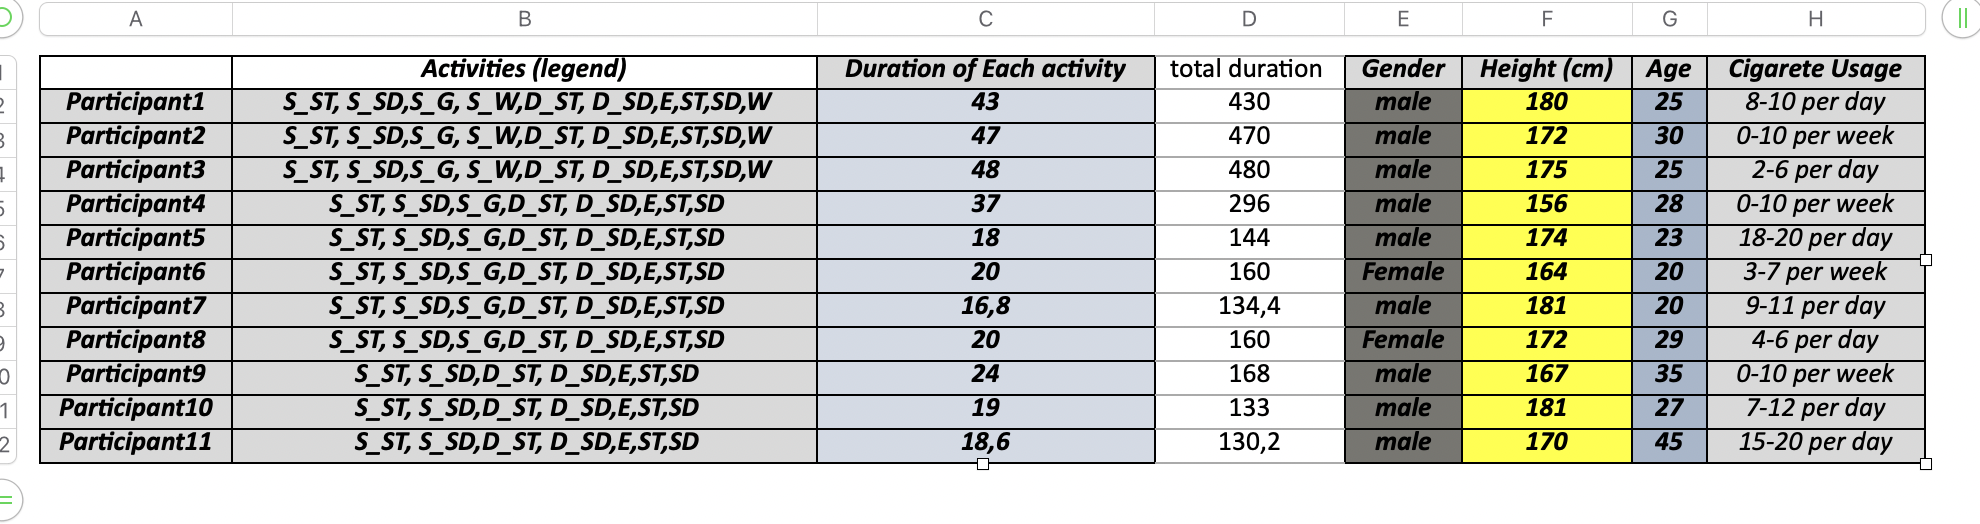

For details about the dataset, please read the data collection section of the following paper:
Shoaib, Muhammad, Hans Scholten, Paul JM Havinga, and Ozlem Durmaz Incel. "A hierarchical lazy smoking detection algorithm using smartwatch sensors." In e-Health Networking, Applications and Services (Healthcom), 2016 IEEE 18th International Conference on, pp. 1-6. IEEE, 2016.

Link requires registration, PDF version available with dataset

- -rw-r--r--  1 ddealmei  staff   327K Jul 18  2016 Smoking_Paper.pdf
- https://ieeexplore.ieee.org/document/7749439

**Relevant Extracts from the research paper**

- Our 45-hour dataset contains 17 hours of smoking while walking, standing, sitting, and while conversing in a group collected over a three months’ period. As far as we know, this is the largest dataset compared with similar studies, as we discuss in Section II. For reproducibility, we make our data logger and dataset publicly available.

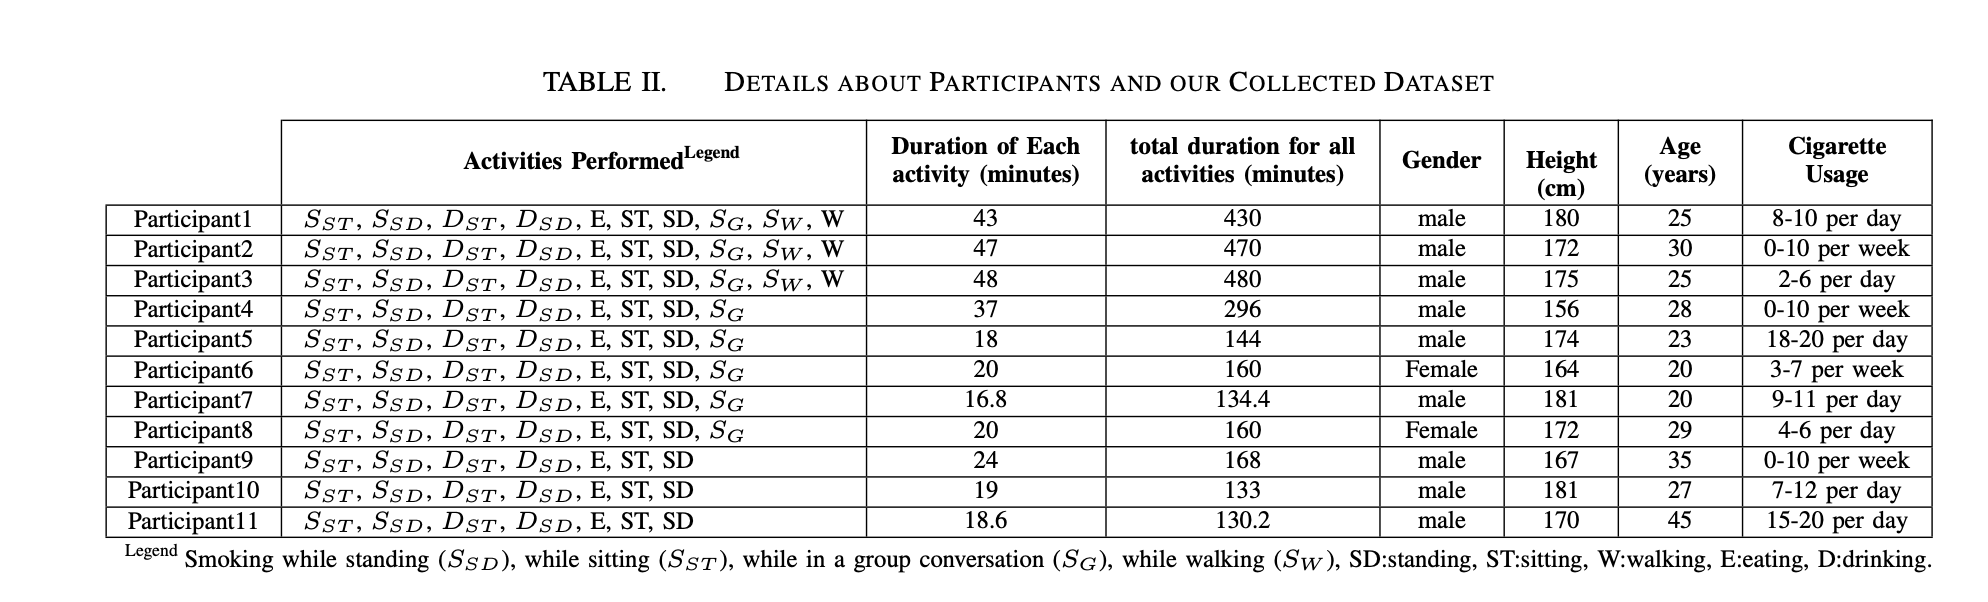

Participant 1-4 performed at least 10 sessions for each activity whereas participants 5-11 performed at least 5 sessions for each of their activities. A brief description about these activities are as follows:

- Smoking: There were four variants of this activity: smoking while sitting, standing, walking, and smoking in a group. Smoking in a group was done while standing in a smoking area where the participants were involved in a conversation with other smokers.


- Drinking: They had a cup of coffee or tea while sitting in our office lounge or standing outdoor. In all sessions, it was a group activity where two or more people were sitting or standing and drinking coffee while involved in a usual group conversation.


- Eating: During the eating activity, users had a cup of soup in their natural style while sitting alone in a lunch place. The participants used a spoon for eating soup which was in a cup on a table.


- Walking: Those participants who performed smoking while walking, also did walking as a separate activity.


- Sitting/Standing: Some of the participants performed sitting and standing for a few minutes.

Each participant wore a smart-watch (LG Watch R, LG Watch Urbane, Sony Watch 3) on the right wrist and a smartphone in the right pocket as all participants were right-handed

We collected data from multiple sensors from both smartwatch and smartphone, **however, we only use accelerometer and gy- roscope in this study**. The data was **collected at 50 samples per second** from these sensors. For data collection, we developed our own Android application which can collect data from multiple sensors, both from the phone and smartwatch in real- time at a user-provided sampling rate. In order to **label the start and end of the activities, participants were told to make a waving gesture.** The dataset and data logger can be accessed at [11].

In [9]:
!pwd

/Users/ddealmei/code/Dekkerz/mocap/notebooks


**Start with Participant 10** one of the smallest data sets in terms of duration 133 minutes in total

In [10]:
#Get the directory, one up + path to file
current_working_dir=os.getcwd()
print(current_working_dir)
filename = os.path.join('..','data','external','UT_Smoking_Data','Participant10_Data.xlsx')
filename

/Users/ddealmei/code/Dekkerz/mocap/notebooks


'../data/external/UT_Smoking_Data/Participant10_Data.xlsx'

In [11]:
%%time
#This may take awhile... there are no column headings so header=None
# execution time on Apple M1 Max with 64GB of memory
# CPU times: user 1min 6s, sys: 310 ms, total: 1min 6s
# Wall time: 1min 6s
p10_data=pd.read_excel(filename, header=None)

CPU times: user 1min 5s, sys: 443 ms, total: 1min 6s
Wall time: 1min 6s


As per the explanation: (Visually checks out using sample size = 5)

Watch 
- col 0 is the timestamp (unknown format at this point)
- col 1-3 Accelerometer(x,y,z)
- col 4-6 Linear acceleration sensor(x,y,z)
- col 7-9 Gyroscope(x,y,z)
- col 10-12 magnetometer(x,y,z)
- col 13 pressure sensor
- col 14 heartratesensor

- col 15 Empty colum

Phone
- col 16 timestamp (unknown format at this point)
- col 17-19 Accelerometer(x,y,z)
- col 20-22 Linear acceleration sensor(x,y,z)
- col 23-25 Gyroscope(x,y,z)
- col 26-28 magnetometer(x,y,z)
- col 29-30 gps(lat, long)
- col 31 class label

In [12]:
p10_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
134084,1456333971125,-3.452759,-7.652741,3.683441,-0.015352,0.264514,-0.295870,-0.261124,-0.004456,-0.047806,-3.240967,50.382996,-14.572144,1012.22235,65,NaN,1456333971130,2.506144,-0.367749,-9.724928,0.103002,0.011827,-0.224862,-0.008552,0.008247,0.001527,24.9375,-2.8750,42.8750,0.000000,0.000000,Eat
38880,1457540000000,-8.541992,-3.779877,0.991241,0.111488,0.312069,0.096089,-0.020905,0.010941,-0.023651,16.265870,27.090454,8.097839,1003.33820,66,NaN,1457540000000,-0.217926,-9.398040,0.013620,0.037390,0.324701,-0.031107,-0.020464,0.052229,-0.011606,16.1875,37.8750,10.1250,52.237916,6.860174,SmokeSD
124073,1455107316849,-5.500244,-4.977722,6.324905,0.021521,0.020256,0.047940,0.277176,0.077438,-0.015945,27.337646,19.422913,-15.386963,989.12630,69,NaN,1455107316857,7.967904,-2.574246,-5.502621,0.219227,-0.076392,-0.035522,0.013134,0.024129,0.003971,-36.2500,6.9375,8.8125,52.238111,6.856433,Eat
366489,1461602689189,9.743652,-1.638062,-0.247299,-0.007718,0.044011,-0.002745,0.004623,0.012512,0.011414,-22.726440,84.062195,26.408386,997.31490,0,NaN,1461602689186,-1.729784,-9.357179,1.797886,0.076113,0.115997,0.017976,-0.029932,0.001222,0.005192,-11.0000,13.6250,-42.5000,0.000000,0.000000,Stand
387350,1461602774465,9.160461,-3.094849,0.190689,-0.108504,0.248310,0.022940,-0.028488,0.052032,0.033844,-15.678406,69.502260,-5.787659,997.31085,0,NaN,1461602774405,-2.628727,-9.125633,1.062387,0.126977,0.235104,0.086122,-0.042761,0.040928,-0.010996,12.6250,4.7500,-3.8750,0.000000,0.000000,Stand


Shape is 413000 rows, 32 cols

As per the research paper:

- Duration for each activity (patient specific) 19 minutes
- Total duration for all activities (patient specific) 133 minutes
- Sampling frequency of 50Hz

133 (minutes) x 60 (seconds) = 7980 seconds
50 (Hz) x 7980 seconds = 399000 observations **(Does not add up to the 413000 rows)**

413000/50 = 8260 seconds or 137.66666 minutes

In [13]:
p10_data.shape

(413000, 32)

Activity duration is slightly longer but seems relevant 19.6 minutes instead of the 19 minutes mentioned in the research paper.

In [14]:
p10_data[31].value_counts()

SmokeSD    59000
SmokeST    59000
Eat        59000
DrinkSD    59000
DrinkST    59000
Sit        59000
Stand      59000
Name: 31, dtype: int64

59000 observations / 50Hz Sampling rate / 60 seconds = no. of minutes

Each participant wore a **smart-watch (LG Watch R, LG Watch Urbane, Sony Watch 3)** on the right wrist and a smartphone in the right pocket as all participants were right-handed.

Quick search indicates asteroidOS

https://asteroidos.org/install/bass/
https://asteroidos.org/wiki/documentation/

AsteroidOS is an open-source operating system for smartwatches based on Linux.

https://github.com/AsteroidOS

Could not find the logger mentioned in the research paper reference

***For reproducibility, we make our data logger and dataset publicly available.***

.... but based on the OS being linux based timestamp should be as follows:

In Linux, a timestamp is actually stored as a number of seconds instead of a date and time. This number of seconds refers to the amount of time since 00:00:00 on January 1, 1970, which is the time of Unix Epoch

https://www.geeksforgeeks.org%2Ffile-timestamps-mtime-ctime-and-atime-in-linux%2F&usg=AOvVaw0imIE2TNOalE0yDpi4t726

***There is an online converter to do a SPOT Check***
https://www.epochconverter.com

In [15]:
#Sampling rate is 50Hz so looking at the first 60 rows where timechange should have occurred after 50?
datetime_df=p10_data.iloc[0:60,0:1]
print(datetime_df.shape)
print(datetime_df.columns)
#have to /1000 as the timestamp appears to be in milliseconds
datetime_df[0].map(lambda x: datetime.datetime.fromtimestamp(x/1000))
# date seems to correspond with the timeframe 2016 however on row 60 we are still on the same minute/second 15:46:40

(60, 1)
Int64Index([0], dtype='int64')


0    2016-03-02 15:46:40
1    2016-03-02 15:46:40
2    2016-03-02 15:46:40
3    2016-03-02 15:46:40
4    2016-03-02 15:46:40
5    2016-03-02 15:46:40
6    2016-03-02 15:46:40
7    2016-03-02 15:46:40
8    2016-03-02 15:46:40
9    2016-03-02 15:46:40
10   2016-03-02 15:46:40
11   2016-03-02 15:46:40
12   2016-03-02 15:46:40
13   2016-03-02 15:46:40
14   2016-03-02 15:46:40
15   2016-03-02 15:46:40
16   2016-03-02 15:46:40
17   2016-03-02 15:46:40
18   2016-03-02 15:46:40
19   2016-03-02 15:46:40
20   2016-03-02 15:46:40
21   2016-03-02 15:46:40
22   2016-03-02 15:46:40
23   2016-03-02 15:46:40
24   2016-03-02 15:46:40
25   2016-03-02 15:46:40
26   2016-03-02 15:46:40
27   2016-03-02 15:46:40
28   2016-03-02 15:46:40
29   2016-03-02 15:46:40
30   2016-03-02 15:46:40
31   2016-03-02 15:46:40
32   2016-03-02 15:46:40
33   2016-03-02 15:46:40
34   2016-03-02 15:46:40
35   2016-03-02 15:46:40
36   2016-03-02 15:46:40
37   2016-03-02 15:46:40
38   2016-03-02 15:46:40
39   2016-03-02 15:46:40


In [16]:
#rename column for ease of use
p10_data.rename(columns={0:'WatchTime'},inplace=True)
p10_data

,WatchTime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.830841,-10.147159,-1.634442,-0.312794,-0.498202,-0.307753,-0.069944,0.095600,0.068417,-7.1875,34.1250,-21.5625,52.237942,6.859675,SmokeSD
1,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.299648,-9.588725,-1.048767,-0.832154,0.060576,0.285542,-0.088270,0.146302,0.035430,-7.0625,34.1875,-21.4375,52.237942,6.859675,SmokeSD
2,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.898943,-10.051817,-1.239452,-0.230651,-0.404605,0.111754,-0.034819,0.191506,-0.013134,-6.6250,34.2500,-21.3750,52.237942,6.859675,SmokeSD
3,1456930000000,11.617004,-7.362854,2.870987,2.898125,-2.786147,0.452619,-0.826218,0.784821,0.003052,-34.446716,-1.170349,9.002686,992.61880,68,NaN,1456930000000,1.253072,-9.861132,-1.321174,0.117301,-0.214565,0.029449,0.032376,0.229991,0.003665,-6.3125,34.3125,-21.3125,52.237942,6.859675,SmokeSD
4,1456930000000,11.617004,-7.362854,2.870987,2.898125,-2.786147,0.452619,-0.826218,0.784821,0.003052,-34.446716,-1.170349,9.002686,992.61880,68,NaN,1456930000000,1.688923,-9.684067,-1.348414,0.539689,-0.037469,-0.009460,0.051313,0.312458,-0.009468,-5.5625,34.0000,-21.3750,52.237942,6.859675,SmokeSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412995,1461602747308,9.303284,-3.273376,0.152603,0.001466,-0.006599,-0.007316,0.003555,0.005035,0.002869,-14.434814,68.417360,-8.827209,997.28864,0,NaN,1461602747305,-2.833032,-9.139254,0.912563,0.042337,0.187154,-0.047025,-0.026267,-0.000305,0.005498,12.6250,4.5625,-3.5000,0.000000,0.000000,Stand
412996,1461602747328,9.312805,-3.280518,0.178787,0.007633,-0.017115,0.011982,0.006760,0.005035,0.002869,-17.326355,67.724610,-8.445740,997.28864,0,NaN,1461602747325,-2.805792,-9.139254,0.994285,0.069173,0.187241,0.034343,-0.030849,-0.000611,0.010996,12.6250,4.5625,-3.4375,0.000000,0.000000,Stand
412997,1461602747349,9.343750,-3.251953,0.195450,-0.009044,0.036479,-0.024797,0.009964,0.005035,0.003937,-17.346191,67.727660,-8.441162,997.26447,0,NaN,1461602747345,-2.792171,-9.071152,0.912563,0.082189,0.255556,-0.047122,-0.024129,-0.004276,0.002749,12.7500,4.5625,-3.3750,0.000000,0.000000,Stand
412998,1461602747368,9.308044,-3.282898,0.152603,-0.009148,0.024417,-0.012937,0.007828,0.008240,0.005005,-16.261292,67.124940,-8.787537,997.26240,0,NaN,1461602747365,-2.833032,-9.084772,0.885323,0.041515,0.241856,-0.074572,-0.029322,-0.006720,0.013439,12.6250,4.5000,-3.3125,0.000000,0.000000,Stand


In [17]:
# Count by WatchTime, expected count should be 50, see much larger numbers. Appears to be an issue with the logger?
p10_WatchTime_df=p10_data.WatchTime.value_counts()
p10_WatchTime_df

1455110000000    8600
1456930000000    8400
1456920000000    7400
1457460000000    7250
1456840000000    7250
                 ... 
1456920522197       1
1456920522218       1
1456920522237       1
1456920522258       1
1459435369334       1
Name: WatchTime, Length: 249790, dtype: int64

Lets do the same check using the Phone recorded time

In [18]:
p10_data.rename(columns={16:'PhoneTime'},inplace=True)
p10_data

,WatchTime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,PhoneTime,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.830841,-10.147159,-1.634442,-0.312794,-0.498202,-0.307753,-0.069944,0.095600,0.068417,-7.1875,34.1250,-21.5625,52.237942,6.859675,SmokeSD
1,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.299648,-9.588725,-1.048767,-0.832154,0.060576,0.285542,-0.088270,0.146302,0.035430,-7.0625,34.1875,-21.4375,52.237942,6.859675,SmokeSD
2,1456930000000,10.026917,-3.090088,0.700089,2.045898,-0.026381,-1.476833,-1.635849,0.920471,0.054321,-35.858154,-0.819397,11.027527,991.38464,68,NaN,1456930000000,0.898943,-10.051817,-1.239452,-0.230651,-0.404605,0.111754,-0.034819,0.191506,-0.013134,-6.6250,34.2500,-21.3750,52.237942,6.859675,SmokeSD
3,1456930000000,11.617004,-7.362854,2.870987,2.898125,-2.786147,0.452619,-0.826218,0.784821,0.003052,-34.446716,-1.170349,9.002686,992.61880,68,NaN,1456930000000,1.253072,-9.861132,-1.321174,0.117301,-0.214565,0.029449,0.032376,0.229991,0.003665,-6.3125,34.3125,-21.3125,52.237942,6.859675,SmokeSD
4,1456930000000,11.617004,-7.362854,2.870987,2.898125,-2.786147,0.452619,-0.826218,0.784821,0.003052,-34.446716,-1.170349,9.002686,992.61880,68,NaN,1456930000000,1.688923,-9.684067,-1.348414,0.539689,-0.037469,-0.009460,0.051313,0.312458,-0.009468,-5.5625,34.0000,-21.3750,52.237942,6.859675,SmokeSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412995,1461602747308,9.303284,-3.273376,0.152603,0.001466,-0.006599,-0.007316,0.003555,0.005035,0.002869,-14.434814,68.417360,-8.827209,997.28864,0,NaN,1461602747305,-2.833032,-9.139254,0.912563,0.042337,0.187154,-0.047025,-0.026267,-0.000305,0.005498,12.6250,4.5625,-3.5000,0.000000,0.000000,Stand
412996,1461602747328,9.312805,-3.280518,0.178787,0.007633,-0.017115,0.011982,0.006760,0.005035,0.002869,-17.326355,67.724610,-8.445740,997.28864,0,NaN,1461602747325,-2.805792,-9.139254,0.994285,0.069173,0.187241,0.034343,-0.030849,-0.000611,0.010996,12.6250,4.5625,-3.4375,0.000000,0.000000,Stand
412997,1461602747349,9.343750,-3.251953,0.195450,-0.009044,0.036479,-0.024797,0.009964,0.005035,0.003937,-17.346191,67.727660,-8.441162,997.26447,0,NaN,1461602747345,-2.792171,-9.071152,0.912563,0.082189,0.255556,-0.047122,-0.024129,-0.004276,0.002749,12.7500,4.5625,-3.3750,0.000000,0.000000,Stand
412998,1461602747368,9.308044,-3.282898,0.152603,-0.009148,0.024417,-0.012937,0.007828,0.008240,0.005005,-16.261292,67.124940,-8.787537,997.26240,0,NaN,1461602747365,-2.833032,-9.084772,0.885323,0.041515,0.241856,-0.074572,-0.029322,-0.006720,0.013439,12.6250,4.5000,-3.3125,0.000000,0.000000,Stand


In [19]:
p10_PhoneTime_df=p10_data.PhoneTime.value_counts()
p10_PhoneTime_df

1455110000000    8600
1456930000000    8400
1456920000000    7400
1457460000000    7250
1456840000000    7250
                 ... 
1456920461778       1
1456920461818       1
1456920461819       1
1456920461844       1
1459435381599       1
Name: PhoneTime, Length: 281374, dtype: int64

## Pre-processing exploration

### Load "Valid" P1 Patient File 

In [21]:
%%time

#Check the data directory
data_dir=os.path.join('..','data','external','UT_Smoking_Data')

#These files are large so providing option to load all or just one

#loop through files in the data_dir
for file in os.listdir(data_dir):
    if file.endswith("Participant1_Data.xlsx"):
        filename=os.path.join(data_dir,file)
        print(f'processing file: {filename}')
        data=pd.read_excel(filename, header=None)

processing file: ../data/external/UT_Smoking_Data/Participant1_Data.xlsx
CPU times: user 2min 23s, sys: 815 ms, total: 2min 24s
Wall time: 2min 24s


### Renaming the column names

Rename column names according to research paper description

In [22]:
column_names = {0:'timestamp_WD', 
             1:'Accelerometer_x_WD', 2:'Accelerometer_y_WD', 3:'Accelerometer_z_WD', 
             4:'Linear_acceleration_sensor_x_WD', 5:'Linear_acceleration_sensor_y_WD', 6:'Linear_acceleration_sensor_z_WD', 
             7:'Gyroscope_x_WD', 8:'Gyroscope_y_WD', 9:'Gyroscope_z_WD',
            10:'Magnetometer_x_WD', 11:'Magnetometer_y_WD', 12:'Magnetometer_z_WD', 
             13:'Pressure_sensor_WD', 14:'Heart_rate_sensor_WD',
            15:'GAP', 
             16:'timestamp_PD', 
             17:'Accelerometer_x_PD', 18:'Accelerometer_y_PD', 19:'Accelerometer_z_PD',
            20:'Linear_acceleration_sensor_x_PD', 21:'Linear_acceleration_sensor_y_PD', 22:'Linear_acceleration_sensor_z_PD', 
             23:'Gyroscope_x_PD', 24:'Gyroscope_y_PD',25:'Gyroscope_z_PD', 
             26:'Magnetometer_x_PD', 27:'Magnetometer_y_PD', 28:'Magnetometer_z_PD', 
             29:'GPS_lat_PD',30:'GPS_long_PD', 
             31:'Class_label'}

data.rename(columns=column_names,inplace=True)

In [23]:
data.columns

Index(['timestamp_WD', 'Accelerometer_x_WD', 'Accelerometer_y_WD',
       'Accelerometer_z_WD', 'Linear_acceleration_sensor_x_WD',
       'Linear_acceleration_sensor_y_WD', 'Linear_acceleration_sensor_z_WD',
       'Gyroscope_x_WD', 'Gyroscope_y_WD', 'Gyroscope_z_WD',
       'Magnetometer_x_WD', 'Magnetometer_y_WD', 'Magnetometer_z_WD',
       'Pressure_sensor_WD', 'Heart_rate_sensor_WD', 'GAP', 'timestamp_PD',
       'Accelerometer_x_PD', 'Accelerometer_y_PD', 'Accelerometer_z_PD',
       'Linear_acceleration_sensor_x_PD', 'Linear_acceleration_sensor_y_PD',
       'Linear_acceleration_sensor_z_PD', 'Gyroscope_x_PD', 'Gyroscope_y_PD',
       'Gyroscope_z_PD', 'Magnetometer_x_PD', 'Magnetometer_y_PD',
       'Magnetometer_z_PD', 'GPS_lat_PD', 'GPS_long_PD', 'Class_label'],
      dtype='object')

### Removing polluted timestamps

There are some "polluted" timestamps with non-integers. We need to drop these are part of the pre-processing

- original file has 904400 rows, one of which is polluted. We could also apply a "one-off fix?"
- means that we would have to drop the entire gesture instance, impact to RNN?

In [24]:
data[data.timestamp_WD.apply(lambda x: isinstance(x,int))]

,timestamp_WD,Accelerometer_x_WD,Accelerometer_y_WD,Accelerometer_z_WD,Linear_acceleration_sensor_x_WD,Linear_acceleration_sensor_y_WD,Linear_acceleration_sensor_z_WD,Gyroscope_x_WD,Gyroscope_y_WD,Gyroscope_z_WD,Magnetometer_x_WD,Magnetometer_y_WD,Magnetometer_z_WD,Pressure_sensor_WD,Heart_rate_sensor_WD,GAP,timestamp_PD,Accelerometer_x_PD,Accelerometer_y_PD,Accelerometer_z_PD,Linear_acceleration_sensor_x_PD,Linear_acceleration_sensor_y_PD,Linear_acceleration_sensor_z_PD,Gyroscope_x_PD,Gyroscope_y_PD,Gyroscope_z_PD,Magnetometer_x_PD,Magnetometer_y_PD,Magnetometer_z_PD,GPS_lat_PD,GPS_long_PD,Class_label
0,1455278271218,-5.973572,-6.710114,2.555145,-0.474457,0.382236,0.345239,-0.014404,-0.001846,-0.028992,15.905762,41.093445,3.219604,997.52484,84,NaN,1455278271219,-0.490333,-9.343558,1.116869,-0.040446,0.369063,-0.161003,0.038790,0.006414,-0.004276,13.9375,39.0000,-26.2500,52.238673,6.857011,SmokeSD
1,1455278271238,-5.980713,-6.838654,2.605133,-0.471420,0.249793,0.383285,0.001617,-0.005051,-0.027924,15.916443,41.191100,3.067017,997.47235,84,NaN,1455278271238,-0.490333,-9.343558,1.144109,-0.040433,0.368693,-0.136580,0.037568,0.025351,-0.010079,13.8750,39.0000,-26.2500,52.238673,6.857011,SmokeSD
2,1455278271258,-6.025940,-6.895783,2.514679,-0.504273,0.187889,0.285115,0.009094,-0.015732,-0.027924,15.763855,42.268370,2.624512,997.40674,84,NaN,1455278271259,-0.463092,-9.302697,1.171350,-0.013792,0.408633,-0.116517,0.033292,0.027184,-0.009774,13.8750,38.6875,-26.2500,52.238673,6.857011,SmokeSD
3,1455278271279,-5.956909,-7.031464,2.752716,-0.424346,0.048824,0.503679,0.019775,-0.015732,-0.015106,16.072083,41.833496,3.517151,997.43300,84,NaN,1455278271278,-0.381370,-9.316318,1.239452,0.066282,0.394378,-0.053767,0.021380,0.025351,-0.009774,13.8125,38.8750,-26.2500,52.238673,6.857011,SmokeSD
4,1455278271298,-5.959290,-6.900543,2.743195,-0.414628,0.176953,0.475054,0.006958,-0.013596,-0.004425,16.108704,41.365050,3.822327,997.40674,84,NaN,1455278271299,-0.435851,-9.275456,1.089628,0.010319,0.434809,-0.207327,0.023824,0.053145,-0.015577,13.8125,38.6875,-26.2500,52.238673,6.857011,SmokeSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904395,1461602683308,9.681763,-1.978455,-0.256821,-0.134968,-0.414399,0.267209,0.146683,-0.002441,-0.181915,-20.312500,81.712340,27.458190,997.30130,0,NaN,1461602683305,-1.797886,-9.248216,1.729784,0.045443,0.226585,-0.002465,-0.004276,-0.078802,-0.013439,-10.6250,13.8125,-42.2500,0.000000,0.000000,Stand
904396,1461602683329,9.865051,-1.980835,-0.268723,0.076663,-0.508131,0.216074,0.150955,0.010376,-0.156281,-21.047974,82.527160,26.156616,997.36100,0,NaN,1461602683326,-2.056673,-9.384419,1.675303,-0.216302,0.090158,-0.061307,-0.004581,-0.056505,-0.010385,-10.7500,14.0000,-42.0000,0.000000,0.000000,Stand
904397,1461602683348,10.057861,-2.002258,-0.361557,0.315035,-0.547142,0.158731,0.115707,0.043488,-0.106079,-21.578980,82.846070,25.646973,997.36740,0,NaN,1461602683345,-1.784266,-9.438901,1.634442,-0.001223,0.104033,-0.199140,-0.027489,-0.047953,-0.010996,-10.5000,13.9375,-42.0625,0.000000,0.000000,Stand
904398,1461602683369,10.045959,-1.964172,-0.349655,0.272425,-0.496381,0.132929,0.087936,0.065918,-0.056946,-21.786499,82.226560,26.109314,997.31860,0,NaN,1461602683365,-1.675303,-9.248216,1.716164,0.157120,0.227571,-0.022247,-0.046731,-0.015272,0.004581,-10.3750,13.9375,-41.9375,0.000000,0.000000,Stand


In [25]:
#update our df for further processing
data=data[data.timestamp_WD.apply(lambda x: isinstance(x,int))]

### Convert TimeStamp to DateTime

In [27]:
%%time
#have to divide by 1000 as we have the linux timestamp in milli seconds
#strftime to drop the milli seconds
#for validation creating an extra column with the milli seconds
data['datetime_WD']=data.timestamp_WD.apply(lambda x: datetime.datetime.fromtimestamp(x/1000).strftime("%Y-%m-%d %H:%M:%S"))
data['datetime_WD_ms']=data.timestamp_WD.apply(lambda x: datetime.datetime.fromtimestamp(x/1000))


CPU times: user 2.43 s, sys: 29.2 ms, total: 2.46 s
Wall time: 2.46 s


In [28]:
data.head(5)

,timestamp_WD,Accelerometer_x_WD,Accelerometer_y_WD,Accelerometer_z_WD,Linear_acceleration_sensor_x_WD,Linear_acceleration_sensor_y_WD,Linear_acceleration_sensor_z_WD,Gyroscope_x_WD,Gyroscope_y_WD,Gyroscope_z_WD,Magnetometer_x_WD,Magnetometer_y_WD,Magnetometer_z_WD,Pressure_sensor_WD,Heart_rate_sensor_WD,GAP,timestamp_PD,Accelerometer_x_PD,Accelerometer_y_PD,Accelerometer_z_PD,Linear_acceleration_sensor_x_PD,Linear_acceleration_sensor_y_PD,Linear_acceleration_sensor_z_PD,Gyroscope_x_PD,Gyroscope_y_PD,Gyroscope_z_PD,Magnetometer_x_PD,Magnetometer_y_PD,Magnetometer_z_PD,GPS_lat_PD,GPS_long_PD,Class_label,datetime_WD,datetime_WD_ms
0,1455278271218,-5.973572,-6.710114,2.555145,-0.474457,0.382236,0.345239,-0.014404,-0.001846,-0.028992,15.905762,41.093445,3.219604,997.52484,84,NaN,1455278271219,-0.490333,-9.343558,1.116869,-0.040446,0.369063,-0.161003,0.038790,0.006414,-0.004276,13.9375,39.0000,-26.25,52.238673,6.857011,SmokeSD,2016-02-12 12:57:51,2016-02-12 12:57:51.218
1,1455278271238,-5.980713,-6.838654,2.605133,-0.471420,0.249793,0.383285,0.001617,-0.005051,-0.027924,15.916443,41.191100,3.067017,997.47235,84,NaN,1455278271238,-0.490333,-9.343558,1.144109,-0.040433,0.368693,-0.136580,0.037568,0.025351,-0.010079,13.8750,39.0000,-26.25,52.238673,6.857011,SmokeSD,2016-02-12 12:57:51,2016-02-12 12:57:51.238
2,1455278271258,-6.025940,-6.895783,2.514679,-0.504273,0.187889,0.285115,0.009094,-0.015732,-0.027924,15.763855,42.268370,2.624512,997.40674,84,NaN,1455278271259,-0.463092,-9.302697,1.171350,-0.013792,0.408633,-0.116517,0.033292,0.027184,-0.009774,13.8750,38.6875,-26.25,52.238673,6.857011,SmokeSD,2016-02-12 12:57:51,2016-02-12 12:57:51.258
3,1455278271279,-5.956909,-7.031464,2.752716,-0.424346,0.048824,0.503679,0.019775,-0.015732,-0.015106,16.072083,41.833496,3.517151,997.43300,84,NaN,1455278271278,-0.381370,-9.316318,1.239452,0.066282,0.394378,-0.053767,0.021380,0.025351,-0.009774,13.8125,38.8750,-26.25,52.238673,6.857011,SmokeSD,2016-02-12 12:57:51,2016-02-12 12:57:51.279
4,1455278271298,-5.959290,-6.900543,2.743195,-0.414628,0.176953,0.475054,0.006958,-0.013596,-0.004425,16.108704,41.365050,3.822327,997.40674,84,NaN,1455278271299,-0.435851,-9.275456,1.089628,0.010319,0.434809,-0.207327,0.023824,0.053145,-0.015577,13.8125,38.6875,-26.25,52.238673,6.857011,SmokeSD,2016-02-12 12:57:51,2016-02-12 12:57:51.298


In [29]:
data.dtypes

timestamp_WD                               object
Accelerometer_x_WD                        float64
Accelerometer_y_WD                        float64
Accelerometer_z_WD                        float64
Linear_acceleration_sensor_x_WD           float64
Linear_acceleration_sensor_y_WD           float64
Linear_acceleration_sensor_z_WD           float64
Gyroscope_x_WD                            float64
Gyroscope_y_WD                            float64
Gyroscope_z_WD                            float64
Magnetometer_x_WD                         float64
Magnetometer_y_WD                         float64
Magnetometer_z_WD                         float64
Pressure_sensor_WD                        float64
Heart_rate_sensor_WD                        int64
GAP                                       float64
timestamp_PD                                int64
Accelerometer_x_PD                        float64
Accelerometer_y_PD                        float64
Accelerometer_z_PD                        float64


### Checking the sampling rate of 50Hz

In [32]:
# where we have 50 observations per second
data.groupby(by=['datetime_WD']).datetime_WD.count() == 50

datetime_WD
2016-02-03 14:41:43    False
2016-02-03 14:41:44     True
2016-02-03 14:41:45     True
2016-02-03 14:41:46     True
2016-02-03 14:41:47     True
                       ...  
2016-04-25 18:47:03    False
2016-04-25 18:47:04    False
2016-04-25 18:47:05    False
2016-04-25 18:47:06    False
2016-04-25 18:47:07    False
Name: datetime_WD, Length: 15536, dtype: bool

In [33]:
#df[(df.column3 != 0) & (df.groupby("column3").column3.transform("size") >= 3)]

data[(data.groupby(by=['datetime_WD']).datetime_WD.count() == 50)]

/var/folders/zd/ntbb4jts6nq3fnwt2m_cvw200000gn/T/ipykernel_70835/2576472948.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.groupby(by=['datetime_WD']).datetime_WD.count() == 50)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df_timestamp=data.groupby(by=['timestamp_WD'])['timestamp_WD'].count().reset_index(name='counts')
df_timestamp

In [ ]:
df_timestamp.counts.unique()

In [ ]:
def check_sampling_rate(data):
    
    return 0

In [ ]:
data.shape